# PCA降维案例

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [2]:
iris = load_iris()
y = iris.target
X = iris.data
#作为数组，X是几维？
X.shape

(150, 4)

In [3]:
#作为数据表或特征矩阵，X是几维？
import pandas as pd
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
#调用PCA
pca = PCA(n_components=2) #实例化
pca = pca.fit(X) #拟合模型
X_dr = pca.transform(X) #获取新矩阵
X_dr
#也可以fit_transform一步到位
#X_dr = PCA(2).fit_transform(X)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [5]:
#要将三种鸢尾花的数据分布显示在二维平面坐标系中，对应的两个坐标（两个特征向量）应该是三种鸢尾花降维后的
#x1和x2，怎样才能取出三种鸢尾花下不同的x1和x2呢？
X_dr[y == 0, 0] #这里是布尔索引，看出来了么？
#要展示三中分类的分布，需要对三种鸢尾花分别绘图
#可以写成三行代码，也可以写成for循环

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978])

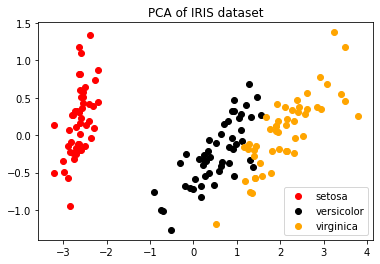

In [6]:
plt.figure()
plt.scatter(X_dr[y==0, 0], X_dr[y==0, 1], c="red", label=iris.target_names[0])
plt.scatter(X_dr[y==1, 0], X_dr[y==1, 1], c="black", label=iris.target_names[1])
plt.scatter(X_dr[y==2, 0], X_dr[y==2, 1], c="orange", label=iris.target_names[2])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

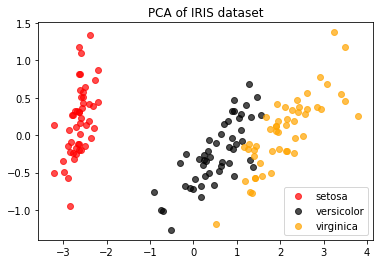

In [9]:
colors = ['red', 'black', 'orange']
iris.target_names
plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X_dr[y == i, 0]
    ,X_dr[y == i, 1]
    ,alpha=.7
    ,c=colors[i]
    ,label=iris.target_names[i]
    )
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

In [11]:
#属性explained_variance_，查看降维后每个新特征向量上所带的信息量大小（可解释性方差的大小）
pca.explained_variance_


array([4.22824171, 0.24267075])

In [12]:
#属性explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
#又叫做可解释方差贡献率
pca.explained_variance_ratio_


array([0.92461872, 0.05306648])

In [13]:
#大部分信息都被有效地集中在了第一个特征上
pca.explained_variance_ratio_.sum()

0.977685206318795

**选择最好的n_components：累积可解释方差贡献率曲线**

In [14]:
pca_line = PCA().fit(X)
pca_line.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

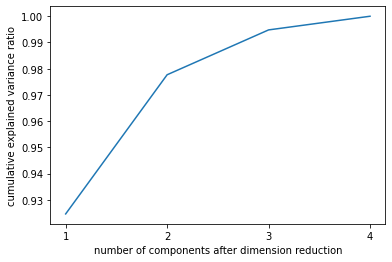

In [15]:
import numpy as np
pca_line = PCA().fit(X)
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4]) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

**最大似然估计自选超参数**

In [16]:
pca_mle = PCA(n_components="mle")
pca_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)
X_mle
#可以发现，mle为我们自动选择了3个特征


array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [17]:
pca_mle.explained_variance_ratio_.sum()
#得到了比设定2个特征时更高的信息含量，对于鸢尾花这个很小的数据集来说，3个特征对应这么高的信息含量，并不
#需要去纠结于只保留2个特征，毕竟三个特征也可以可视化

0.9947878161267247

**按信息量占比选超参数**

In [25]:
pca_f = PCA(n_components=0.97,svd_solver="full")
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)
X_f

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [23]:
pca_f.explained_variance_ratio_.sum()

0.9947878161267247

In [26]:
PCA(2).fit(X).components_


array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [28]:
PCA(2).fit(X).components_.shape # 降维过后的新的特征空间V（k,n）

(2, 4)

# SVD降维案列-人脸识别

In [20]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [21]:
faces = fetch_lfw_people(min_faces_per_person=60)
faces

{'data': array([[0.00130719, 0.        , 0.02091503, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.11764706, 0.13464053,
         0.18039216],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.12287582, 0.1267974 ,
         0.12287582],
        [0.24183007, 0.23921569, 0.23006536, ..., 0.5398693 , 0.46797386,
         0.44836602]], dtype=float32),
 'images': array([[[0.00130719, 0.        , 0.02091503, ..., 0.        ,
          0.        , 0.        ],
         [0.00130719, 0.        , 0.01830065, ..., 0.        ,
          0.        , 0.        ],
         [0.00261438, 0.00130719, 0.03660131, ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.00130719, ..., 0.        ,
     

In [22]:
faces.images.shape
#怎样理解这个数据的维度？


(1277, 62, 47)

In [23]:
faces.data.shape
#换成特征矩阵之后，这个矩阵是什么样？
X = faces.data

看看图像什么样？将原特征矩阵进行可视化


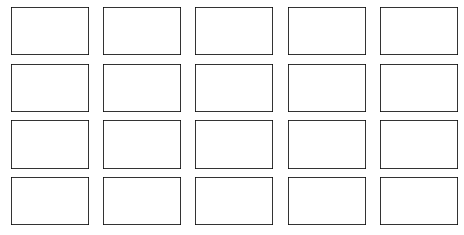

In [24]:
#数据本身是图像，和数据本身只是数字，使用的可视化方法不同
#创建画布和子图对象
fig, axes = plt.subplots(4,5
                        ,figsize=(8,4)
                        ,subplot_kw = {"xticks":[],"yticks":[]} #不要显示坐标轴
                        )


In [25]:
axes


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

In [26]:
#不难发现，axes中的一个对象对应fig中的一个空格
#我们希望，在每一个子图对象中填充图像（共24张图），因此我们需要写一个在子图对象中遍历的循环
axes.shape


(4, 5)

In [27]:
#二维结构，可以有两种循环方式，一种是使用索引，循环一次同时生成一列上的三个图
#另一种是把数据拉成一维，循环一次只生成一个图
#在这里，究竟使用哪一种循环方式，是要看我们要画的图的信息，储存在一个怎样的结构里
#我们使用 子图对象.imshow 来将图像填充到空白画布上
#而imshow要求的数据格式必须是一个(m,n)格式的矩阵，即每个数据都是一张单独的图
#因此我们需要遍历的是faces.images，其结构是(1277, 62, 47)
#要从一个数据集中取出24个图，明显是一次性的循环切片[i,:,:]来得便利
#因此我们要把axes的结构拉成一维来循环
axes.flat
enumerate(axes.flat)
#填充图像
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:]
    ,cmap="gray" #选择色彩的模式
    )


重要属性components_

In [31]:
#原本有2900维，我们现在来降到150维
pca = PCA(150).fit(X)
V = pca.components_ # V 新的特征空间
V.shape


(150, 2914)

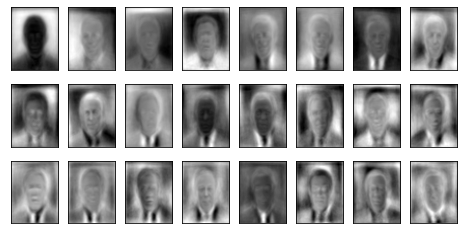

In [32]:
fig, axes = plt.subplots(3,8,figsize=(8,4),subplot_kw = {"xticks":[],"yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62,47),cmap="gray")

重要接口inverse_transform

In [33]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
faces = fetch_lfw_people(min_faces_per_person=60)
faces.images.shape
#怎样理解这个数据的维度？
faces.data.shape
#换成特征矩阵之后，这个矩阵是什么样？
X = faces.data

In [34]:
pca = PCA(150)
X_dr = pca.fit_transform(X)
X_dr.shape

(1277, 150)

In [35]:
X_inverse = pca.inverse_transform(X_dr)
X_inverse.shape

(1277, 2914)

In [39]:
faces.images

array([[[0.00130719, 0.        , 0.02091503, ..., 0.        ,
         0.        , 0.        ],
        [0.00130719, 0.        , 0.01830065, ..., 0.        ,
         0.        , 0.        ],
        [0.00261438, 0.00130719, 0.03660131, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.00130719, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

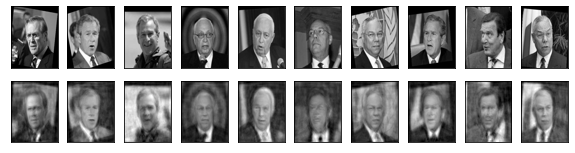

In [40]:
fig, ax = plt.subplots(2,10,figsize=(10,2.5)
                        ,subplot_kw={"xticks":[],"yticks":[]}
                        )
#和2.3.3节中的案例一样，我们需要对子图对象进行遍历的循环，来将图像填入子图中
#那在这里，我们使用怎样的循环？
#现在我们的ax中是2行10列，第一行是原数据，第二行是inverse_transform后返回的数据
#所以我们需要同时循环两份数据，即一次循环画一列上的两张图，而不是把ax拉平
for i in range(10):
    ax[0,i].imshow(faces.images[i,:,:],cmap="binary_r")
    ax[1,i].imshow(X_inverse[i].reshape(62,47),cmap="binary_r")

# 迷你案例：用PCA做噪音过滤   
降维的目的之一就是希望抛弃掉对模型带来负面影响的特征，而我们相信，带有效信息的特征的方差应该是远大于
噪音的，所以相比噪音，有效的特征所带的信息应该不会在PCA过程中被大量抛弃。inverse_transform能够在不
恢复原始数据的情况下，将降维后的数据返回到原本的高维空间，即是说能够实现”保证维度，但去掉方差很小特
征所带的信息“。利用inverse_transform的这个性质，我们能够实现噪音过滤。

In [41]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [42]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [44]:
digits.images.shape

(1797, 8, 8)

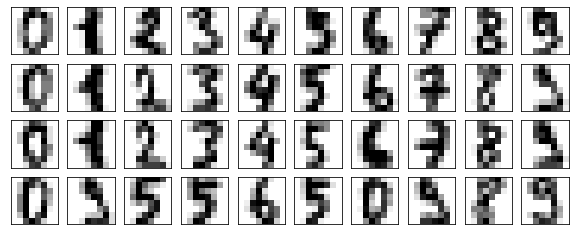

In [46]:
def plot_digits(data):
    fig, axes = plt.subplots(4,10,figsize=(10,4)
                            ,subplot_kw = {"xticks":[],"yticks":[]}
                            )
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap="binary")
plot_digits(digits.data)

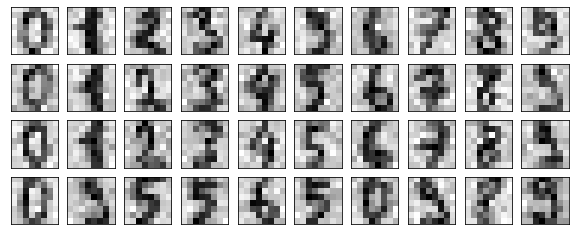

In [47]:
np.random.RandomState(42)
#在指定的数据集中，随机抽取服从正态分布的数据
#两个参数，分别是指定的数据集，和抽取出来的正太分布的方差
noisy = np.random.normal(digits.data,2)
plot_digits(noisy)

In [54]:
pca = PCA(0.5,svd_solver='full').fit(noisy)
X_dr = PCA(0.5,svd_solver='full').fit_transform(noisy)
X_dr.shape

(1797, 6)

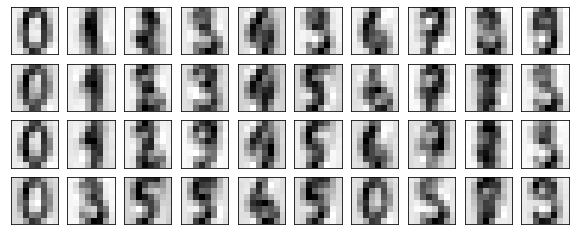

In [55]:
without_noise = pca.inverse_transform(X_dr)
plot_digits(without_noise)

# 案例：PCA对手写数字数据集的降维

In [1]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('sklearn/04主成分分析PCA与奇异值分解SVD/digit recognizor.csv')
X = data.iloc[:,1:]
y = data.iloc[:,0]
X.shape

(42000, 784)

画累计方差贡献率曲线，找最佳降维后维度的范围

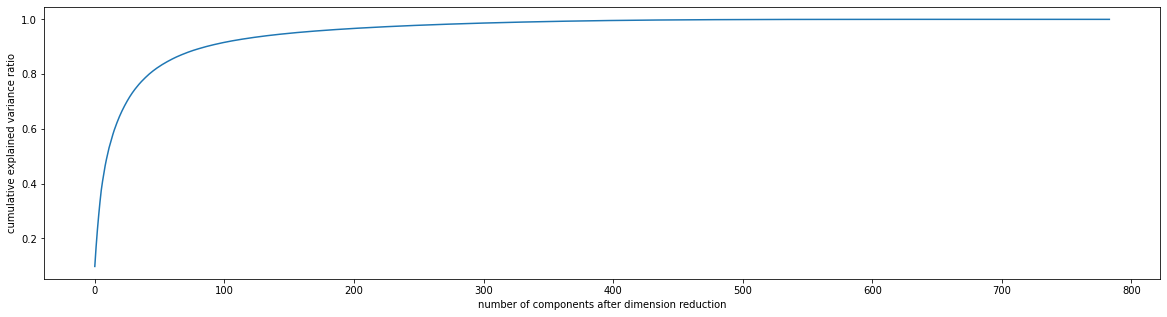

In [3]:
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

降维后维度的学习曲线，继续缩小最佳维度的范围

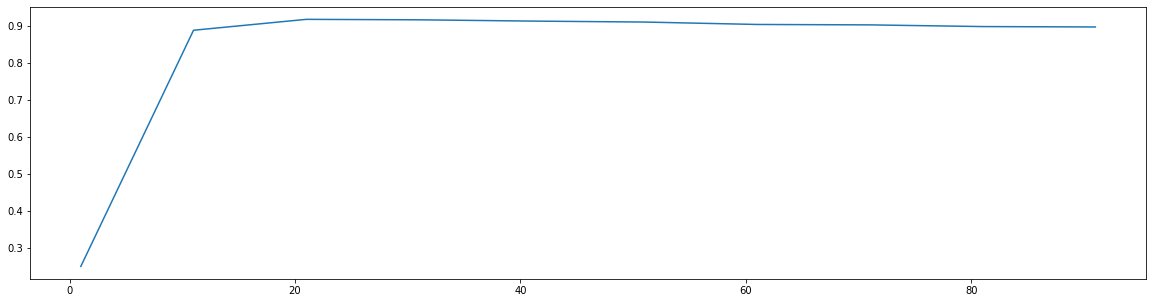

In [4]:
#======【TIME WARNING：2mins 30s】======#
score = []
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0)
    ,X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

细化学习曲线，找出降维后的最佳维度

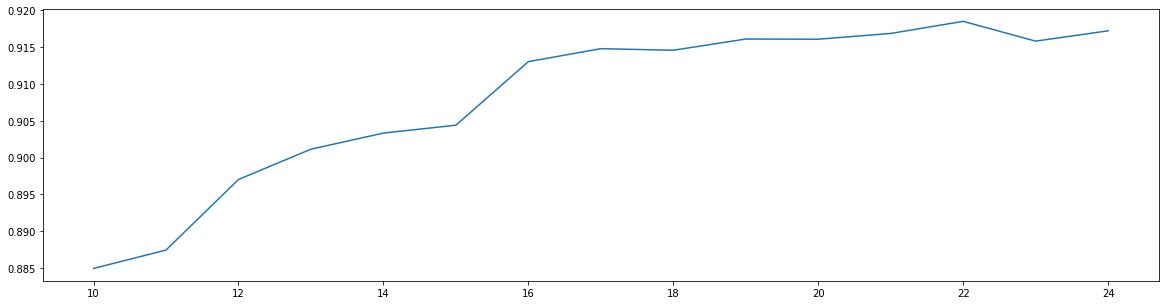

In [5]:
#======【TIME WARNING：2mins 30s】======#
score = []
for i in range(10,25):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()

导入找出的最佳维度进行降维，查看模型效果

In [7]:
X_dr = PCA(23).fit_transform(X)
#======【TIME WARNING:1mins 30s】======#
cross_val_score(RFC(n_estimators=200,random_state=0),X_dr,y,cv=5).mean()

0.9475238095238094

突发奇想，特征数量已经不足原来的3%，换模型怎么样？

In [8]:
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(),X_dr,y,cv=5).mean()

0.9699047619047618

KNN的k值学习曲线

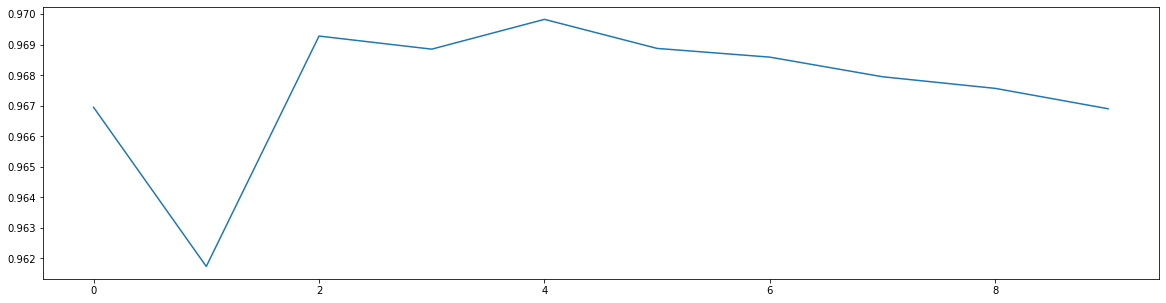

In [9]:
#======【TIME WARNING: 】======#
score = []
for i in range(10):
    X_dr = PCA(23).fit_transform(X)
    once = cross_val_score(KNN(i+1),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()

定下超参数后，模型效果如何，模型运行时间如何？

In [11]:
cross_val_score(KNN(4),X_dr,y,cv=5).mean()
#=======【TIME WARNING: 3mins】======#
%%timeit


UsageError: Line magic function `%%timeit` not found.


In [12]:
cross_val_score(KNN(4),X_dr,y,cv=5).mean()

0.9688571428571429